<h1>Philippine Football Analysis</h1>

<h2>1. Import Libraries and Read in Data</h2>

In [1]:
# import the necessary libraries
import pandas as pd
import numpy as np
import re

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# import the dataset
df_azkals = pd.read_csv("./ph_national_football_team_results.csv")

<h2>2. Data Understanding</h2>
<p>In this section, a quick inspection of the dataset will be performed. As shown below:</p>
<ul>
    <li>The date column has different date formats.</li>
    <li>There are matches that have not yet occurred (as of August 13, 2024).</li>
    <li>The Philippines is both on the home_team and away_team columns.</li>
    <li>Scores are in a single column separated by a dash and ordered by the home side and away side respectively.</li>
    <li>The location column typically has the city and the country available with some rows possibly missing either one.</li>
</ul>
<p>Using the info method on the dataframe, it can be seen that:</p>
<ul>
    <li>On initial import, every column uses the object datatype.</li>
    <li>The date column has 2 null values.</li>
</ul>

In [3]:
df_azkals.head()

,competition,date,home_team,scores,away_team,location
0,Unofficial Friendly,1915,South China A.A.,3–1,Philippines,"Shanghai, China"
1,Friendly[1],6 January 1968,Philippines,2–1,Dallas Tornado,"Manila, Philippines"
2,Friendly,12 February 1972,Philippines,0–6,Cruzeiro,"Manila, Philippines"
3,1972 Jakarta Anniversary Tournament,6 June 1972,South Korea B,1–1,Philippines,Jakarta
4,1972 Merdeka Tournament,23 July 1972,Philippines,1–1,Burma B,"Ipoh, Malaysia"


In [4]:
df_azkals.tail()

,competition,date,home_team,scores,away_team,location
406,2026 World Cup qualification,June 11 2024,Indonesia,2–0,Philippines,"Jakarta, Indonesia"
407,2024 ASEAN Championship,November 27 2024,Philippines,v,Myanmar,"Manila, Philippines"
408,2024 ASEAN Championship,November 30 2024,Laos,v,Philippines,"Vientiane, Laos"
409,2024 ASEAN Championship,December 3 2024,Philippines,v,Vietnam,"Manila, Philippines"
410,2024 ASEAN Championship,December 7 2024,Indonesia,v,Philippines,"Jakarta, Indonesia"


In [5]:
# Checks Null Values and Data Types
df_azkals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 411 entries, 0 to 410
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   competition  411 non-null    object
 1   date         409 non-null    object
 2   home_team    411 non-null    object
 3   scores       411 non-null    object
 4   away_team    411 non-null    object
 5   location     411 non-null    object
dtypes: object(6)
memory usage: 19.4+ KB


<h2>3. Data Preparation</h2>
<h3>3.1 Date Column</h3>
<p>As shown below, multiple formats are used for dates. There are a few anomalies in some dates such as having a few extra characters, having an incomplete date, etc. Majority would fall under the following formats:</p>
<ul>
    <li>dd mmmm yyyy</li>
    <li>mmmm dd yyyy</li>
</ul>
<p>Given that there aren't that many rows (411 rows), anomalies in the dates can be individually handled as needed. The current goal is to turn all of these into the same format then convert the column into datetime.</p>

In [6]:
df_azkals["date"]

0                  1915 
1        6 January 1968 
2      12 February 1972 
3           6 June 1972 
4          23 July 1972 
             ...        
406         June 11 2024
407     November 27 2024
408     November 30 2024
409      December 3 2024
410      December 7 2024
Name: date, Length: 411, dtype: object

In [7]:
# Remove whitespace outside the date
df_azkals["date"] = df_azkals["date"].str.strip()

In [8]:
df_azkals["date"].unique()

array(['1915', '6 January 1968', '12 February 1972', '6 June 1972',
       '23 July 1972', '12 December 1975', '16 August 1981',
       '18 August 1981', '6 August 1986', '8 August 1986',
       '10 August 1986', '7 May 1991', '9 May 1991', '12 May 1993',
       '13 May 1993', '14 May 1993', '15 February 1997',
       '19 February 1997', '21 February 1997', '7 March 1998',
       '9 March 1998', '11 March 1998', '14 March 1998', '15 March 1998',
       '3 April 2006', '11 October 2008', '13 October 2008',
       '17 January 2010', '3 October 2010', '9 October 2010',
       '27 November 2010', '9 March 2011', '11 March 2011', '5 June 2011',
       '15 June 2011', '17 June 2011', '22 June 2011', '24 June 2011',
       '16 July 2011', '18 July 2011', '3 December 2011',
       '7 January 2012', '21 January 2012', '11 February 2012',
       '13 February 2012', '16 February 2012', '11 August 2012',
       '5 September 2012', '10 September 2012', '14 April 2014',
       '10 May 2014', '27 Aug

<p>Regular expressions will be used to identify formats that do not match any of the two aforementioned common formats. There are dates with the 'dd mmmm yyyy yyyy' format. When making regex for the 'dd mmmm yyyy' format, exclude those rows.</p>

In [9]:
# define date format regex
d_m_y_dates = df_azkals["date"].str.contains('[0-9]{1,2}\s[\w]+\s[0-9]{4}$', na=False)
m_d_y_dates = df_azkals["date"].str.contains('[\w]+\s[0-9]{1,2}\s[0-9]{4}', na=False)
d_m_y_y_dates = df_azkals["date"].str.contains('[0-9]{1,2}\s[\w]+\s[0-9]{4}\s[0-9]{4}', na=False)

In [10]:
# Check the count of values
print(f"d_m_y_y: {len(df_azkals[d_m_y_y_dates])}")
print(f"d_m_y: {len(df_azkals[d_m_y_dates])}")
print(f"m_d_y: {len(df_azkals[m_d_y_dates])}")

d_m_y_y: 18
d_m_y: 324
m_d_y: 61


In [11]:
# clean up dates with the dd mmmm yyyy yyyy format
d_m_y_y_regex = '[0-9]{1,2}\s[\w]+\s[0-9]{4}\s[0-9]{4}'
df_azkals["date"] = df_azkals["date"].apply(lambda date: str(date[:-5]) if re.search(d_m_y_y_regex, str(date)) else date)

<p>There are 6 dates with a different format and 2 null values. For most of these values, the actual date can be seen. These only need a little cleaning up.</p>
<p>For the other less obvious dates and null values, the source of these rows in Wikipedia and their respective references will be investigated.</p>

In [12]:
# Anomaly Date Formats
df_azkals[(~(d_m_y_dates | m_d_y_dates))]["date"].unique()

array(['1915', '26 July 2016[35]', 'October 15, 2023', 'June\xa0? 1940',
       '27 September 1967', '28 September 1967', '3 October 1967',
       '7 October 1967', '10 October 1967', '29 March 1959',
       '31 March 1959', '25 May 1958', '26 May 1958', '30 May 1958', nan,
       '25 February 1956', '21 April 1956', '3 May 1954', '6 May 1954',
       '31 January 1953', '20 June 1953', '19 February 1950',
       '21 February 1948', '6 September[46] 2016', '9 November[46] 2016'],
      dtype=object)

In [13]:
# Clean up dates with extra characters
df_azkals.loc[df_azkals["date"] == "26 July 2016[35]", "date"] = "26 July 2016"
df_azkals.loc[df_azkals["date"] == "October 15, 2023", "date"] = "15 October 2023"
df_azkals.loc[df_azkals["date"] == "6 September[46] 2016", "date"] = "6 September 2016"
df_azkals.loc[df_azkals["date"] == "9 November[46] 2016", "date"] = "9 November 2016"

<p>Based on the source of the data on Wikipedia, the unofficial friendly with South China A.A. in 1915 likely occurred after the countries other games between May 17-20, 1915 in the Far East Asian Games (Knight, 2023). The match will be assumed to have occurred on May 21, 1915 a day after the Philippines' last official game in the 1915 Far East Asian Games.</p>

<p>Also based off of the match data's source on Wikipedia, the match with Manchukuo in the 1940 East Asian Games likely occurred between two other matches on June 8 and June 16, 1940 respectively (Veroeveren, 2017). The match will be assumed to have occurred on June 12, 1940.</p>

<p>Regarding the null values, it appears doubtful that the matches occurred. The source of the data does not have any specific dates and the competition where the games allegedly occurred appear to not exist based on Research. The competition is the 1956 South East Asian Games of which any outside references cannot be found (Garin, 1999). It should be noted that the the first South East Asian Peninsular Games (a precursor to the modern SEA games) happened in 1959 which makes the competition less likely to have existed. Given this, the games with null values will be dropped.</p>

In [14]:
df_azkals.loc[(df_azkals["date"] == "1915") | (df_azkals["date"] == "June\xa0? 1940") | (df_azkals["date"].isna())]

,competition,date,home_team,scores,away_team,location
0,Unofficial Friendly,1915,South China A.A.,3–1,Philippines,"Shanghai, China"
81,1940 East Asian Games,June ? 1940,Manchukuo,1–1,Philippines,Japan
128,Unofficial friendly,NaN,Philippines,0–2,Japan,"Manila, Philippines"
129,Unofficial friendly,NaN,Philippines,0–3,Japan,"Manila, Philippines"


In [15]:
# Impute the values
df_azkals.iloc[0, 1] = "21 May 1915"
df_azkals.iloc[81, 1] = "12 June 1940"
df_azkals.drop([128,129], axis=0, inplace=True)
df_azkals.reset_index(drop=True, inplace=True)

In [16]:
# Convert all into datetime
df_azkals["date"] = pd.to_datetime(df_azkals["date"], format="mixed", errors="raise")

<p>Some of the matches scraped have not yet occurred. These should be dropped. For documentation purposes, the date this was run is 2024-8-17.</p>

In [17]:
# Show current timestamp
current_timestamp = pd.Timestamp.now()
print(f"Current Timestamp: {current_timestamp}")

# Drop future matches
future_matches = df_azkals["date"] > current_timestamp
df_azkals.drop(df_azkals[future_matches].index, axis=0, inplace=True)

Current Timestamp: 2024-08-19 10:00:08.152418


<h3>3.2 Competition Column</h3>
<p>As can be seen below, the competition data looks to be fairly clean. There may be differences in some competitions only due to capitalization or extra characters. This can be cleaned up by removing the extra characters and lowercasing all the characters.</p>
<p>Some of the competitions also have suffixes indicating what stage of the competition the team is playing. For example 'gs' and 'sf', for 'group stage' and 'semi final' respectively. This may be meaningful so for now, these suffixes will be kept. They may be dropped later on if the suffixes are unavailable for most other competitions.</p>

In [18]:
df_azkals["competition"]

0                      Unofficial Friendly
1                              Friendly[1]
2                                 Friendly
3      1972 Jakarta Anniversary Tournament
4                  1972 Merdeka Tournament
                      ...                 
400      2026 FIFA World Cup qualification
401           2026 World Cup qualification
402           2026 World Cup qualification
403           2026 World Cup qualification
404           2026 World Cup qualification
Name: competition, Length: 405, dtype: object

In [19]:
# Convert the column into string
df_azkals["competition"] = df_azkals["competition"].astype("string")

In [20]:
# Show the count of unique competitions
print(f"Count of Unique Values: {len(df_azkals['competition'].unique())}")

Count of Unique Values: 158


In [21]:
# Inspect the competitions participated in
df_azkals["competition"].unique()

<StringArray>
[                'Unofficial Friendly',                         'Friendly[1]',
                            'Friendly', '1972 Jakarta Anniversary Tournament',
             '1972 Merdeka Tournament',                         'Friendly[2]',
 '1981 Jakarta Anniversary Tournament',           '1986 President Aquino Cup',
  '1991 Philippines International Cup',  '1993 Philippines International Cup',
 ...
    '2018 AFF Championship SF 1st leg',    '2018 AFF Championship SF 2nd leg',
               '2019 AFC Asian Cup GS',   '2022 FIFA World Cup qualification',
            '2020 AFF Championship GS',         '2022 FAS Tri-Nations Series',
    '2023 AFC Asian Cup qualification',            '2022 AFF Championship GS',
   '2026 FIFA World Cup qualification',        '2026 World Cup qualification']
Length: 158, dtype: string

<p>Lowercasing did not do much to reduce the number of unique values. </p>

In [22]:
df_azkals["competition"] = df_azkals["competition"].str.lower()
print(f"Count of Unique Values: {len(df_azkals['competition'].unique())}")

Count of Unique Values: 157


In [23]:
df_azkals[(df_azkals["competition"].str.contains("\[[a-zA-Z0-9]+\]")) | (df_azkals["competition"].str.contains("\[[a-z]+\s[0-9]{1}\]"))]["competition"].unique()

<StringArray>
[                     'friendly[1]',                      'friendly[2]',
                      'friendly[3]',                      'friendly[4]',
                      'friendly[5]',                      'friendly[6]',
                      'friendly[8]',                      'friendly[9]',
                     'friendly[10]',                     'friendly[11]',
                     'friendly[12]',                     'friendly[13]',
                     'friendly[14]',                     'friendly[15]',
                     'friendly[16]',                     'friendly[17]',
                     'friendly[18]',                     'friendly[19]',
                     'friendly[20]',                     'friendly[21]',
                     'friendly[22]',                     'friendly[24]',
                     'friendly[25]',                     'friendly[27]',
                     'friendly[29]',                     'friendly[31]',
                 'friendly[32][33]', 

In [24]:
# Remove the brackets
df_azkals["competition"] = df_azkals["competition"].replace("\[[a-zA-Z0-9]+\]","", regex=True)
df_azkals["competition"] = df_azkals["competition"].replace("\[[a-z]+\s[0-9]{1}\]","", regex=True)

In [25]:
df_azkals["competition"].unique()

<StringArray>
[                'unofficial friendly',                            'friendly',
 '1972 jakarta anniversary tournament',             '1972 merdeka tournament',
 '1981 jakarta anniversary tournament',           '1986 president aquino cup',
  '1991 philippines international cup',  '1993 philippines international cup',
                "1997 president's cup",             "1997 president's cup sf",
 ...
    '2018 aff championship sf 1st leg',    '2018 aff championship sf 2nd leg',
               '2019 afc asian cup gs',   '2022 fifa world cup qualification',
            '2020 aff championship gs',         '2022 fas tri-nations series',
    '2023 afc asian cup qualification',            '2022 aff championship gs',
   '2026 fifa world cup qualification',        '2026 world cup qualification']
Length: 113, dtype: string

<p>The suffixes discovered are:
<ul>
    <li>sf</li>
    <li>3rd place</li>
    <li>gs</li>
    <li>r1</li>
    <li>11th place</li>
    <li>sf 1st leg</li>
    <li>sf 2nd leg</li>
</ul>

In [26]:
# Inspect the suffixes in the competitions
list(df_azkals["competition"].unique())

['unofficial friendly',
 'friendly',
 '1972 jakarta anniversary tournament',
 '1972 merdeka tournament',
 '1981 jakarta anniversary tournament',
 '1986 president aquino cup',
 '1991 philippines international cup',
 '1993 philippines international cup',
 "1997 president's cup",
 "1997 president's cup sf",
 "1998 president's centennial cup",
 "1998 president's centennial cup sf",
 "1998 president's centennial cup 3rd place",
 '2006 afc challenge cup gs',
 '2010 long teng cup',
 '1913 far eastern championship games',
 '1915 far eastern championship games',
 '1917 far eastern championship games',
 '1919 far eastern championship games',
 '1921 far eastern championship games',
 '1923 far eastern championship games',
 '1925 far eastern championship games',
 '1927 far eastern championship games',
 '1930 far eastern championship games',
 '1934 far eastern championship games',
 '1940 east asian games',
 '1977 southeast asian games gs',
 '1976 summer olympics qualification',
 'aloha soccer festiv

<p>One of the competitions found was the "1972 oqt" which is actually the 1972 Summer Olympics Football Qualifiers.</p>

In [27]:
# rows with OQT were under the 1972 Summer Olympics football qualification
summer_olympics_1972 = df_azkals["competition"].str.contains("oqt")
df_azkals.loc[summer_olympics_1972, "competition"] = "Summer Olympics qualification"
df_azkals[summer_olympics_1972]

,competition,date,home_team,scores,away_team,location
114,Summer Olympics qualification,1971-09-25,Philippines,3–0,Taiwan,"Seoul, South Korea"
115,Summer Olympics qualification,1971-09-27,Japan,8–1,Philippines,"Seoul, South Korea"
116,Summer Olympics qualification,1971-09-29,South Korea,6–0,Philippines,"Seoul, South Korea"
117,Summer Olympics qualification,1971-10-02,Malaysia,5–0,Philippines,"Seoul, South Korea"


In [28]:
# Almost all competitions have years at the start
# Strip the years from competitions
# comps_with_year = (df_azkals["competition"] != "Friendly") & (df_azkals["competition"] != "Aloha Soccer Festival[3][4]")
# competition_col = df_azkals.columns.get_loc("competition")
# for result_index in df_azkals[comps_with_year].index:
#     comp = df_azkals.iloc[result_index, competition_col]
#     df_azkals.iloc[result_index, competition_col] = comp[5:]

In [29]:
# # Remove uneccesary suffixes
# df_azkals["competition"] = df_azkals.loc[:, "competition"].str.replace(" 1st leg", "")
# df_azkals["competition"] = df_azkals.loc[:, "competition"].str.replace(" 2nd leg", "")
# df_azkals["competition"] = df_azkals.loc[:, "competition"].str.replace(" 3rd place", "")
# df_azkals["competition"] = df_azkals.loc[:, "competition"].str.replace(" 11th place", "")
# df_azkals["competition"] = df_azkals.loc[:, "competition"].str.replace(" R1", "")
# df_azkals["competition"] = df_azkals.loc[:, "competition"].str.split("[", n=1).str[0]
# df_azkals["competition"] = df_azkals.loc[:, "competition"].str.replace(" GS", "")
# df_azkals["competition"] = df_azkals.loc[:, "competition"].str.replace(" SF", "")
# df_azkals["competition"] = df_azkals.loc[:, "competition"].str.rstrip("F")
# df_azkals["competition"] = df_azkals.loc[:, "competition"].str.strip()

<h3>3.3 Home Team Column</h3>
<p>The home team column looks pretty clean with both clubs and national teams. Some teams are from younger age groups of their respective senior teams as shown in suffixes like "U-23" or "U-19".</p>
<p>One specific area that appears to need cleaning are the different names used for Taiwan. As shown below, Taiwan, Republic of China, and Chinese Taipei all appear together. These will all be standardized to Chinese Taipei as that is the name used in international sporting events for political reasons.</p>

In [30]:
# Show the different home teams
df_azkals["home_team"] = df_azkals["home_team"].astype("string")
df_azkals["home_team"].unique()

<StringArray>
[          'South China A.A.',                'Philippines',
              'South Korea B', 'Universidad de Guadalajara',
                  'Guangdong',                 'Malay Mail',
             'Rattana Bundit',              'Bangkok Glass',
          'Taipei PE College',        'Chinese Taipei U-23',
             'Hong Kong U-23',              'Nakhon Pathom',
    'Kanto Gakuin University',            'Aachen-Düren XI',
                'Bonner U-19',              'Ingolstadt 04',
               'Darmstadt 98',                'Bahrain U23',
                 'Al Ahli SC',            'Chicago Inferno',
                   'Cambodia',                       'Laos',
             'Al-Muharraq SC',                    'Vietnam',
  'Guangzhou Evergrande (RT)',                 'Kyrgyzstan',
                      'China',                      'Japan',
          'Republic of China',                  'Manchukuo',
                   'Malaysia',                     'Israel',
          

In [31]:
# Display the variations in home_team columns
taiwan_home = df_azkals["home_team"].str.contains("Taiwan")
roc_home = df_azkals["home_team"].str.contains("Republic of China")
taipei_home = df_azkals["home_team"].str.contains("Chinese Taipei")
df_azkals[taiwan_home | roc_home | taipei_home]

,competition,date,home_team,scores,away_team,location
28,friendly,2010-10-03,Chinese Taipei U-23,1–0,Philippines,"Tainan, Taiwan"
80,1940 east asian games,1940-06-08,Republic of China,2–1,Philippines,"Tokyo, Japan"
120,1968 summer olympics qualification,1967-10-03,Taiwan,7–2,Philippines,"Tokyo, Japan"
226,2006 afc challenge cup gs,2006-04-01,Chinese Taipei,1–0,Philippines,"Chittagong, Bangladesh"
246,friendly,2010-01-16,Chinese Taipei,0–0,Philippines,"Kaohsiung, Taiwan"
247,2010 long teng cup,2010-10-10,Chinese Taipei,1–1,Philippines,"Kaohsiung, Taiwan"
267,2011 long teng cup,2011-10-02,Chinese Taipei,0–0,Philippines,"Kaohsiung, Taiwan"
347,2017 ctfa international tournament,2017-12-03,Chinese Taipei,3–0,Philippines,"Taipei, Taiwan"
396,friendly,2023-09-08,Chinese Taipei,1–1,Philippines,"Kaohsiung, Taiwan"


In [32]:
# Standardize Chinese Taipei in home_team column
df_azkals.loc[taiwan_home | roc_home, "home_team"] = "Chinese Taipei"

<h3>3.4 Away Team Column</h3>
<p>The data in the away team column is of a similar nature to the home team column.</p>

In [33]:
df_azkals["away_team"] = df_azkals["away_team"].astype("string")
df_azkals["away_team"].unique()

<StringArray>
[         'Philippines',       'Dallas Tornado',             'Cruzeiro',
              'Burma B',             'Sabah FA',           'Malaysia B',
         'Russian SFSR',          'South China',          'Taipei Bank',
           'Malay Mail',             'Shanghai', 'Woodlands Wellington',
 'Royal Thai Air Force',               'Tatung',    'Hong Kong Rangers',
    'Sembawang Rangers',           'India U-20',        'UFL All Stars',
            'LA Galaxy',      'Inter de Madrid',    'Icheon Citizen FC',
      'Uzbekistan U-23',       'Australia U-23',               'Global',
       'Perth Glory FC',             'Mongolia',     'Chainat Hornbill',
                'China',                'Japan',    'Dutch East Indies',
               'Brunei',            'Indonesia',               'Taiwan',
             'Thailand',            'Sri Lanka',            'Australia',
            'Hong Kong',          'South Korea',        'South Vietnam',
             'Malaysia',             

In [34]:
# Display the variations in the away_team column
taiwan_away = df_azkals["away_team"].str.contains("Taiwan")
roc_away = df_azkals["away_team"].str.contains("Republic of China")
taipei_away = df_azkals["away_team"].str.contains("Chinese Taipei")
df_azkals[taiwan_away | roc_away | taipei_away]

,competition,date,home_team,scores,away_team,location
88,aloha soccer festival,1976-04-08,Philippines,1–0,Taiwan,"Honolulu, United States"
114,Summer Olympics qualification,1971-09-25,Philippines,3–0,Taiwan,"Seoul, South Korea"
124,1960 afc asian cup qualification,1959-03-31,Philippines,4–7,Taiwan,"Manila, Philippines"
131,1954 asian games,1954-05-06,Philippines,0–4,Taiwan,"Manila, Philippines"
283,2012 philippine peace cup,2012-09-29,Philippines,3–1,Chinese Taipei,"Manila, Philippines"
298,2013 philippine peace cup,2013-10-11,Philippines,1–2,Chinese Taipei,"Bacolod, Philippines"
311,2014 philippine peace cup sf,2014-09-03,Philippines,5–1,Chinese Taipei,"Manila, Philippines"
395,friendly,2023-06-19,Philippines,2–3,Chinese Taipei,"Manila, Philippines"


In [35]:
# Standardize Chinese Taipei in home_team column
df_azkals.loc[taiwan_away | roc_away, "away_team"] = "Chinese Taipei"

<h3>3.5 Scores Column</h3>
<p>The scores column is dirty with a extra characters, words, etc. Some scores are not even scores but are about match cancellations. Given that the home and away team goals are grouped together in the same column, aggregations cannot be performed on this column. The goal for this column in data preparation is about cleaning the column enough to easily separate the goals into separate columns in feature creation.</p>

In [36]:
df_azkals["scores"].unique()

array(['3–1', '2–1', '0–6', '1–1', '2–3', '12–0', '2–0', '0–5', '1–5',
       '1–0', '0–0', '1–2', '0–2', '0–1', '0–4', '1–3', '4–2[note 1]',
       '8–0', '4–0', '8–1', '3–4', '1–4', '5–0', '1–6', '1–1 (2–4 p)',
       '0–3', '0–0[note 2]', '2–1[note 3]', '4–2', '2–15', '3–0abandoned',
       '3–0', '7–2', '4–3', '3–2', '4–1', '6–0', '11–0', '2–2', '5–1',
       '?', '0–11', '4–4', '15–0', '11–1', '10–0', '0–7', '4–7', '5–2',
       '6–1', '7–0', '10–1', '7–1', '0–9', '6–2', '1–1 (3–4 p)', '9–0',
       '13–1', '0–1[note 1]', '3–3', 'Cancelled[note 2]', '0–8',
       '2–3 (a.e.t.)', '2–5', 'Cancelled'], dtype=object)

In [45]:
cancelled_games = df_azkals["scores"].str.contains("Cancelled")
df_azkals.drop(df_azkals[cancelled_games].index, inplace=True)
df_azkals.reset_index(inplace=True, drop=True)

<p>Some scores contain penalty scores as well. The penalty scores will be moved to a separate column.</p>
<p>The match between the Philippines and the Khmer Republic on August 5, 1972 in the Pesta Sukan Cup will be treated as a 0-0 draw. The match's source lists the score as unknown (Stokkermans & Cruickshank, 2008).</p>

In [47]:
# Inspect faulty scores
faulty_scores = (df_azkals["scores"].str.len() > 4) | (df_azkals["scores"].str.len() < 3)
df_azkals[faulty_scores]

,competition,date,home_team,scores,away_team,location,penalty_scores
29,2010 long teng cup,2010-10-09,Hong Kong U-23,4–2[note 1],Philippines,"Kaohsiung, Taiwan",<NA>
42,friendly,2012-01-21,Philippines,1–1 (2–4 p),Icheon Citizen FC,"Manila, Philippines",2–4
47,friendly,2012-09-05,Cambodia,0–0[note 2],Philippines,"Phnom Penh, Cambodia",<NA>
48,friendly,2012-09-10,Laos,2–1[note 3],Philippines,"Vientiane, Laos",<NA>
63,1917 far eastern championship games,1917-05-11,China,3–0abandoned,Philippines,"Tokyo, Japan",<NA>
101,1972 pesta sukan cup,1972-08-05,Khmer Republic,?,Philippines,Singapore,<NA>
188,1997 president's cup 3rd place,1997-02-23,Philippines,1–1 (3–4 p),Cambodia,"Iloilo City, Philippines",3–4
255,2010 aff championship sf 1st leg,2010-12-16,Philippines,0–1[note 1],Indonesia,"Jakarta, Indonesia",<NA>
308,2014 afc challenge cup sf,2014-05-27,Maldives,2–3 (a.e.t.),Philippines,"Malé, Maldives",<NA>
311,2014 philippine peace cup f,2014-09-06,Philippines,2–3 (a.e.t.),Myanmar,"Manila, Philippines",<NA>


In [43]:
# Create a column for penalty scores to represent these matches
df_azkals["penalty_scores"] = np.nan
df_azkals["penalty_scores"] = df_azkals["penalty_scores"].astype("string")

# Move penalty scores to its own column
penalties = df_azkals["scores"].str.contains("p")
penalty_results = df_azkals[penalties]["scores"].str[5:8]
df_azkals.loc[penalties, "penalty_scores"] = penalty_results
df_azkals[penalties]

,competition,date,home_team,scores,away_team,location,penalty_scores
42,friendly,2012-01-21,Philippines,1–1 (2–4 p),Icheon Citizen FC,"Manila, Philippines",2–4
188,1997 president's cup 3rd place,1997-02-23,Philippines,1–1 (3–4 p),Cambodia,"Iloilo City, Philippines",3–4


In [49]:
# Correct the faulty scores
correct_scores =  ["4–2", "1–1", "0–0", "2–1", "3–0", "0–0", "1–1", "0–1", "2–3", "2–3"]
df_azkals.loc[faulty_scores, "scores"] = correct_scores
df_azkals[faulty_scores]

,competition,date,home_team,scores,away_team,location,penalty_scores
29,2010 long teng cup,2010-10-09,Hong Kong U-23,4–2,Philippines,"Kaohsiung, Taiwan",<NA>
42,friendly,2012-01-21,Philippines,1–1,Icheon Citizen FC,"Manila, Philippines",2–4
47,friendly,2012-09-05,Cambodia,0–0,Philippines,"Phnom Penh, Cambodia",<NA>
48,friendly,2012-09-10,Laos,2–1,Philippines,"Vientiane, Laos",<NA>
63,1917 far eastern championship games,1917-05-11,China,3–0,Philippines,"Tokyo, Japan",<NA>
101,1972 pesta sukan cup,1972-08-05,Khmer Republic,0–0,Philippines,Singapore,<NA>
188,1997 president's cup 3rd place,1997-02-23,Philippines,1–1,Cambodia,"Iloilo City, Philippines",3–4
255,2010 aff championship sf 1st leg,2010-12-16,Philippines,0–1,Indonesia,"Jakarta, Indonesia",<NA>
308,2014 afc challenge cup sf,2014-05-27,Maldives,2–3,Philippines,"Malé, Maldives",<NA>
311,2014 philippine peace cup f,2014-09-06,Philippines,2–3,Myanmar,"Manila, Philippines",<NA>


## Location Column

<h3>3.6 Location Column</h3>
The location column is mostly clean with a few small corrections.

In [52]:
df_azkals["location"] = df_azkals["location"].astype("string")
df_azkals["location"].unique()

<StringArray>
[                'Shanghai, China',             'Manila, Philippines',
                         'Jakarta',                  'Ipoh, Malaysia',
              'Jakarta, Indonesia',            'Bacolod, Philippines',
        'Iloilo City, Philippines',          'Chittagong, Bangladesh',
               'Bangkok, Thailand',               'Kaohsiung, Taiwan',
                  'Tainan, Taiwan',         'Nakhon Pathom, Thailand',
                  'Gotemba, Japan',             'Makati, Philippines',
                  'Düren, Germany',                 'Alfter, Germany',
             'Ingolstadt, Germany',              'Darmstadt, Germany',
                  'Riffa, Bahrain',                   'Arad, Bahrain',
     'Dubai, United Arab Emirates',                     'Doha, Qatar',
      'Wheaton, United States[26]',            'Phnom Penh, Cambodia',
                 'Vientiane, Laos',             'Bantay, Philippines',
               'Imus, Philippines',                'Guangzhou, 

In [53]:
# Complete and correct a few different locations
matches_jakarta = df_azkals["location"] == "Jakarta"
df_azkals.loc[matches_jakarta, "location"] = "Jakarta, Indonesia"

matches_wheaton = df_azkals["location"] == "Wheaton, United States[26]"
df_azkals.loc[matches_wheaton, "location"] = "Wheaton, United States"

matches_bahrain = df_azkals["location"] == "Bahrain"
df_azkals.loc[matches_bahrain, "location"] = "Al-Hidd, Bahrain"
df_azkals.loc[matches_bahrain, "home_team"] = "Al-Hidd Club"        # Based on article, the team's actual name is Al-Hidd

In [55]:
df_azkals["location"].unique()

<StringArray>
[                'Shanghai, China',             'Manila, Philippines',
              'Jakarta, Indonesia',                  'Ipoh, Malaysia',
            'Bacolod, Philippines',        'Iloilo City, Philippines',
          'Chittagong, Bangladesh',               'Bangkok, Thailand',
               'Kaohsiung, Taiwan',                  'Tainan, Taiwan',
         'Nakhon Pathom, Thailand',                  'Gotemba, Japan',
             'Makati, Philippines',                  'Düren, Germany',
                 'Alfter, Germany',             'Ingolstadt, Germany',
              'Darmstadt, Germany',                  'Riffa, Bahrain',
                   'Arad, Bahrain',     'Dubai, United Arab Emirates',
                     'Doha, Qatar',          'Wheaton, United States',
            'Phnom Penh, Cambodia',                 'Vientiane, Laos',
             'Bantay, Philippines',               'Imus, Philippines',
                'Guangzhou, China',                 'Manama, Ba

<h3>Summary</h3>
<p>As shown below, most columns have been converted to another datatype. The prior section focused mostly on basic data cleaning. More features can be generated to better understand the Philippine Football Team's performance.</p>

In [56]:
# Show dataframe information after cleaning.
df_azkals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 403 entries, 0 to 402
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   competition     403 non-null    string        
 1   date            403 non-null    datetime64[ns]
 2   home_team       403 non-null    string        
 3   scores          403 non-null    object        
 4   away_team       403 non-null    string        
 5   location        403 non-null    string        
 6   penalty_scores  2 non-null      string        
dtypes: datetime64[ns](1), object(1), string(5)
memory usage: 22.2+ KB


<h1 style="fontweight: bold;">CLEANED UP TO THIS POINT</h1>

<h2>4. Feature Creation</h2>
<ul>
    <li>Philippines result column to represent a win, loss, or draw</li>
    <li>Philippines' score and opponent's score Column to separate the scores of teams</li>
    <li>Goal difference column to see by how many goals the Philippines won or loss</li>
    <li>Home game column to represent if a game is home or away (home meaning the game is played in the Philippines)</li>
    <li>Sporting event column to show a series of partiticpation in a particular competition</li>
</ul>





In [31]:
# Initialize additional columns
df_azkals["opponent"] = np.nan
df_azkals["opponent"] = df_azkals["opponent"].astype("string")

df_azkals["match_status"] = np.nan
df_azkals["match_status"] = df_azkals["match_status"].astype("string")

df_azkals["ph_goal"] = 0
df_azkals["opp_goal"] = 0

df_azkals["goal_difference"] = 0
df_azkals["ph_pen_goals"] = 0
df_azkals["opp_pen_goals"] = 0

df_azkals["home_game"] = False
df_azkals["home_game"] = df_azkals["home_game"].astype("bool")

In [32]:
df_azkals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 401 entries, 0 to 400
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   competition      401 non-null    object        
 1   date             399 non-null    datetime64[ns]
 2   home_team        401 non-null    string        
 3   scores           401 non-null    object        
 4   away_team        401 non-null    string        
 5   location         401 non-null    string        
 6   penalty_scores   2 non-null      object        
 7   opponent         0 non-null      string        
 8   match_status     0 non-null      string        
 9   ph_goal          401 non-null    int64         
 10  opp_goal         401 non-null    int64         
 11  goal_difference  401 non-null    int64         
 12  ph_pen_goals     401 non-null    int64         
 13  opp_pen_goals    401 non-null    int64         
 14  home_game        401 non-null    bool     

In [33]:
# split the scores into separate goals per team as they are together in one column
goals = df_azkals["scores"].str.split("–")

# iterate through the dataframe and arrange 
for result_index in df_azkals.index:
    
    # Create variables for column indeces for easier readability when using iloc
    home_team_col = df_azkals.columns.get_loc("home_team")
    away_team_col = df_azkals.columns.get_loc("away_team")
    match_status_col = df_azkals.columns.get_loc("match_status")
    opp_col = df_azkals.columns.get_loc("opponent")
    phil_goal_col = df_azkals.columns.get_loc("ph_goal")
    opp_goal_col = df_azkals.columns.get_loc("opp_goal")
    goal_diff_col = df_azkals.columns.get_loc("goal_difference")
    phil_pen_goals_col = df_azkals.columns.get_loc("ph_pen_goals")
    opp_pen_goals_col = df_azkals.columns.get_loc("opp_pen_goals")

    # Place teams and goals into their respective lists by the order they first appear in the dataframe
    # From left to right, teams and their goals are shown sequentially
    teams = [df_azkals.iloc[result_index, home_team_col], df_azkals.iloc[result_index, away_team_col]]
    goals_per_team = [goals.iloc[result_index][0], goals.iloc[result_index][1]]
    
    # Place the opponents in one column and place the goals by team in their respective columns
    if teams[0] == "Philippines":
        df_azkals.iloc[result_index, opp_col] = teams[1]
        df_azkals.iloc[result_index, opp_goal_col] = int(goals_per_team[1])
        df_azkals.iloc[result_index, phil_goal_col] = int(goals_per_team[0])
    else:
        df_azkals.iloc[result_index, opp_col] = teams[0]
        df_azkals.iloc[result_index, opp_goal_col] = int(goals_per_team[0])
        df_azkals.iloc[result_index, phil_goal_col] = int(goals_per_team[1])
        
    # Determine the match status for the Philippines based on the number of goals
    ph_score = df_azkals.iloc[result_index, phil_goal_col]
    opp_score = df_azkals.iloc[result_index, opp_goal_col]
    pen_score_col = df_azkals.columns.get_loc("penalty_scores")
    if ph_score > opp_score:
        df_azkals.iloc[result_index, match_status_col] = "Win"
    elif ph_score < opp_score:
        df_azkals.iloc[result_index, match_status_col] = "Loss"
    elif ph_score == opp_score:      
        if pd.isnull(df_azkals.iloc[result_index, pen_score_col]):        
            df_azkals.iloc[result_index, match_status_col] = "Draw"
        else: #if ~pd.isnull(df_azkals.iloc[result_index, pen_score_col]):
            pen_goals = df_azkals.iloc[result_index, pen_score_col].split("–")
            if teams[0] == "Philippines":
                df_azkals.iloc[result_index, phil_pen_goals_col] = int(pen_goals[0])
                df_azkals.iloc[result_index, opp_pen_goals_col] = int(pen_goals[1])
            else:
                df_azkals.iloc[result_index, phil_pen_goals_col] = int(pen_goals[1])
                df_azkals.iloc[result_index, opp_pen_goals_col] = int(pen_goals[0])
            # Determines match status based on the results of a penalty shootout 
            if df_azkals.iloc[result_index, phil_pen_goals_col] > df_azkals.iloc[result_index, opp_pen_goals_col]:
                df_azkals.iloc[result_index, match_status_col] = "Win"
            else:
                df_azkals.iloc[result_index, match_status_col] = "Loss"

    # Determine the goal difference per game
    df_azkals.iloc[result_index, goal_diff_col] = int(ph_score) - int(opp_score)
                

In [34]:
df_azkals["match_status"].value_counts()

Loss    238
Win     102
Draw     61
Name: match_status, dtype: Int64

In [48]:
102/(238+102+61)

0.2543640897755611

In [44]:
df_azkals[df_azkals["date"].dt.year > 2000]["match_status"].value_counts()

Loss    102
Win      76
Draw     46
Name: match_status, dtype: int64

In [46]:
76/(102 + 76 + 46)

0.3392857142857143

In [45]:
df_azkals[df_azkals["date"].dt.year > 2005]["match_status"].value_counts()

Loss    88
Win     75
Draw    45
Name: match_status, dtype: int64

In [47]:
75/(88+75+45)

0.3605769230769231

In [42]:
df_azkals["date"].year

0     1915-01-01
1     1968-01-06
2     1972-02-12
3     1972-06-06
4     1972-07-23
         ...    
396   2023-09-08
397   2023-09-12
398   2023-10-17
399   2023-11-16
400   2023-11-21
Name: date, Length: 401, dtype: datetime64[ns]

In [35]:
df_azkals.columns

Index(['competition', 'date', 'home_team', 'scores', 'away_team', 'location',
       'penalty_scores', 'opponent', 'match_status', 'ph_goal', 'opp_goal',
       'goal_difference', 'ph_pen_goals', 'opp_pen_goals', 'home_game'],
      dtype='object')

In [36]:
df_azkals["match_status"] = df_azkals["match_status"].astype("category")
df_azkals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 401 entries, 0 to 400
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   competition      401 non-null    object        
 1   date             399 non-null    datetime64[ns]
 2   home_team        401 non-null    string        
 3   scores           401 non-null    object        
 4   away_team        401 non-null    string        
 5   location         401 non-null    string        
 6   penalty_scores   2 non-null      object        
 7   opponent         401 non-null    string        
 8   match_status     401 non-null    category      
 9   ph_goal          401 non-null    int64         
 10  opp_goal         401 non-null    int64         
 11  goal_difference  401 non-null    int64         
 12  ph_pen_goals     401 non-null    int64         
 13  opp_pen_goals    401 non-null    int64         
 14  home_game        401 non-null    bool     

In [37]:
df_azkals = df_azkals[['date', 'opponent', 'match_status', 'ph_goal',
                       'opp_goal', 'goal_difference', 'ph_pen_goals',
                       'opp_pen_goals', 'competition', 'home_game', 'location',]]

In [38]:
df_azkals

,date,opponent,match_status,ph_goal,opp_goal,goal_difference,ph_pen_goals,opp_pen_goals,competition,home_game,location
0,1915-01-01,South China A.A.,Loss,1,3,-2,0,0,Friendly,False,"Shanghai, China"
1,1968-01-06,Dallas Tornado,Win,2,1,1,0,0,Friendly,False,"Manila, Philippines"
2,1972-02-12,Cruzeiro,Loss,0,6,-6,0,0,Friendly,False,"Manila, Philippines"
3,1972-06-06,South Korea B,Draw,1,1,0,0,0,Jakarta Anniversary Tournament,False,"Jakarta, Indonesia"
4,1972-07-23,Burma B,Draw,1,1,0,0,0,Merdeka Tournament,False,"Ipoh, Malaysia"
...,...,...,...,...,...,...,...,...,...,...,...
396,2023-09-08,Chinese Taipei,Draw,1,1,0,0,0,Friendly,False,"Kaohsiung, Taiwan"
397,2023-09-12,Afghanistan,Win,2,1,1,0,0,Friendly,False,"Manila, Philippines"
398,2023-10-17,Bahrain,Loss,0,1,-1,0,0,Friendly,False,"Arad, Bahrain"
399,2023-11-16,Vietnam,Loss,0,2,-2,0,0,FIFA World Cup qualification,False,"Manila, Philippines"


In [39]:
# Download the dataframe as a csv file
# df_azkals.to_csv('azkals_matches.csv', sep="|")

# 4. Feature Understanding
- Univariate Analysis - use things like a histogram, KDE, boxplot, etc.

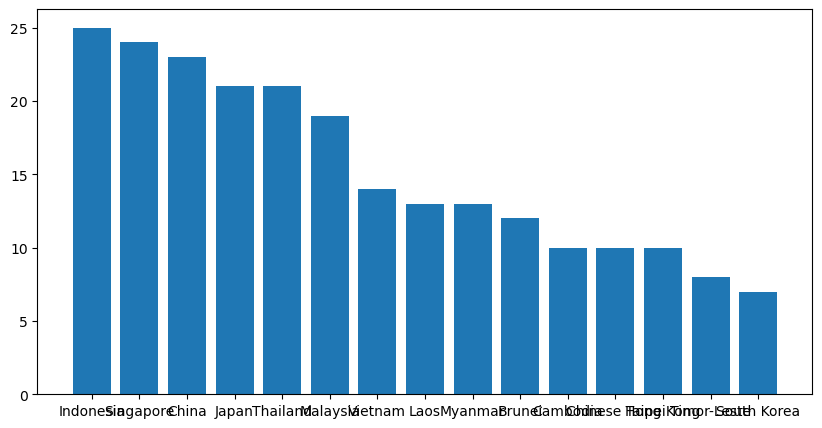

In [40]:
plt.figure(figsize=(10, 5), dpi=100)
ten_most_played = df_azkals["opponent"].value_counts().head(15)
plt.bar(ten_most_played.index, ten_most_played)
plt.show()

# 5. Feature Relationships
- Multivariate Analysis - use things like a Scatterplot, Heatmap Correlation, Pairplot, Groupby Comparisons

# 6. Ask Questions about the Data
- Questions:
1. What is the win, loss, and draw ratio of the Azkals over the decades?
2. Do the Azkals experience a higher win rate when playing at home?
3. By how many goals do the Azkals tend to win or lose by?
4. What are the competitions that the azkals most commonly plays in?
5. What teams do the Azkals play against most often and what is their performance against them?

# 7. Geospatial Data (Optional)

<h2>References</h2>
<ul>
    <li>Garin, E. (1999, December 10). South East Asian Games 1956 (Manila, Philippines). Rec.Sport.Soccer Statistics Foundation. Retrieved August 14, 2024, from https://www.rsssf.org/tabless/sea56.html</li>
    <li>Knight, K. (2023, October 27). Second Far Eastern Games 1915 (Shanghai). Rec.Sport.Soccer Statistics Foundation. Retrieved August 14, 2024, from https://www.rsssf.org/tablesf/fareastgames15.html#det</li>
    <li>Stokkermans, K., & Cruickshank, M. (2008, April 18). Pesta Sukan Cup 1972. Rec.Sport.Soccer Statistics Foundation. Retrieved August 19, 2024, from https://www.rsssf.org/tablesp/pestasukan72.html</li>
</ul>